In [2]:
#importing modules
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Activation
from keras.optimizers import Adam
from keras.applications import MobileNetV2
import cv2
import numpy as np
import numpy as np
from keras.preprocessing import image
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
IMG_SIZE=224

Using TensorFlow backend.


In [3]:

#creating train data
import random
id_array=["0","1","2","3"]
train_data=[]
path2="image_data/"

def create_train_data():
  for category in id_array:
    newpath=os.path.join(path2,category)
    class_num=id_array.index(category)
    for img in os.listdir(newpath):
        img_array=cv2.imread(os.path.join(newpath,img) )
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        # print(img_array)
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
##        plt.imshow(new_array,cmap="gray")
##        plt.show()
##        break
        train_data.append([new_array,class_num])

create_train_data()
random.shuffle(train_data)


X=[]
y=[]
i=0  
for features , labels in train_data:
  X.append(features)
  y.append(labels)
depth = 5
print(len(X))
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X=X/255.0
one_hot_y=tf.one_hot(y, 4)
ohy=np.array(one_hot_y)


with open("X.txt", "wb") as fp:
    pickle.dump(X, fp)

with open("y.txt", "wb") as fp:
    pickle.dump(ohy, fp)

800


In [41]:
#Creating Model 
NUM_CLASSES=4
def get_model():
    model = Sequential([
        MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False),name='a',
        Dropout(0.5),
        Conv2D(NUM_CLASSES, (1, 1), padding='valid'),
        Activation('relu'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ])
    return model

model = get_model()


TypeError: ignored

In [33]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# start training
model.fit(X,ohy, batch_size=32,epochs=10,validation_split=0.15)

Train on 680 samples, validate on 120 samples
Epoch 1/10
680/680 [==============================] - 132s 195ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.5266 - val_accuracy: 0.2833
Epoch 2/10
680/680 [==============================] - 126s 186ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4773 - val_accuracy: 0.2750
Epoch 3/10
680/680 [==============================] - 120s 176ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.4293 - val_accuracy: 0.2833
Epoch 4/10
680/680 [==============================] - 128s 189ms/step - loss: 6.6978e-04 - accuracy: 1.0000 - val_loss: 1.4187 - val_accuracy: 0.3000
Epoch 5/10
680/680 [==============================] - 134s 197ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.3192 - val_accuracy: 0.3000
Epoch 6/10
680/680 [==============================] - 126s 185ms/step - loss: 8.1309e-04 - accuracy: 1.0000 - val_loss: 1.3024 - val_accuracy: 0.3083
Epoch 7/10
680/680 [==============================] - 130s 191ms/step 

KeyboardInterrupt: ignored

In [29]:
# save the model for later use
model.save("rock-paper-scissors-model.h5")

In [43]:
model=keras.models.load_model("rock-paper-scissors-model.h5")

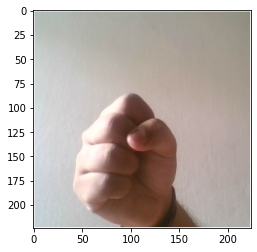

0


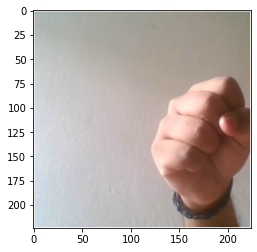

0


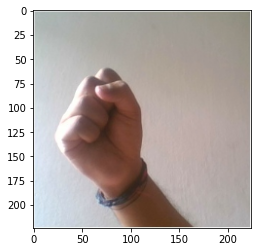

0


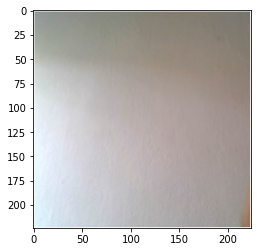

3


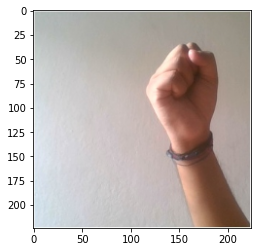

0


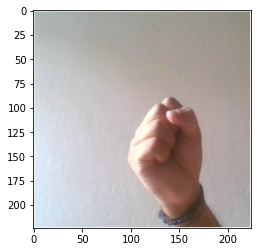

0


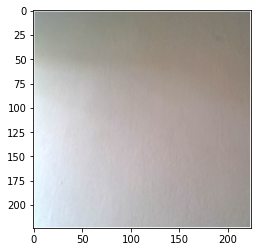

3


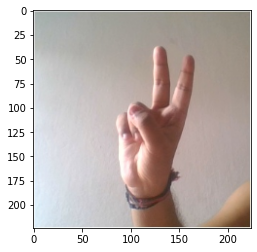

1


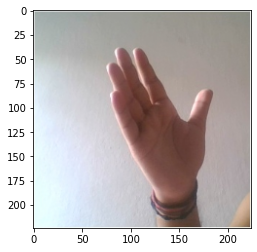

2


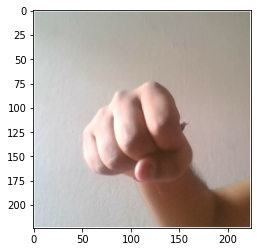

0


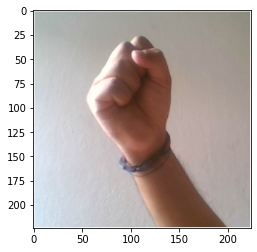

0


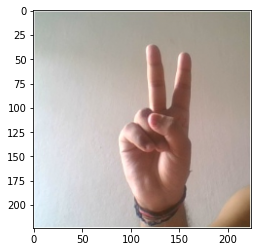

1


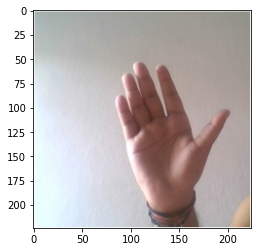

2


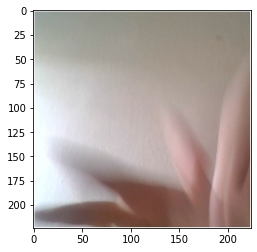

3


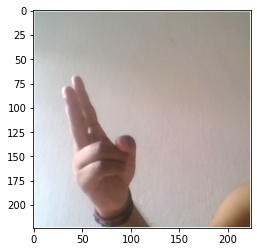

1


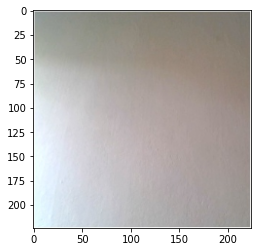

3


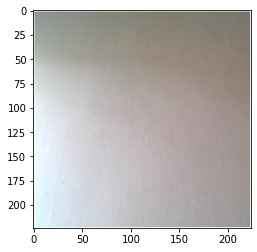

3


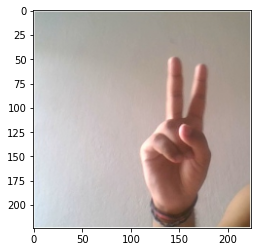

1


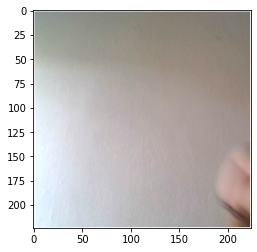

3


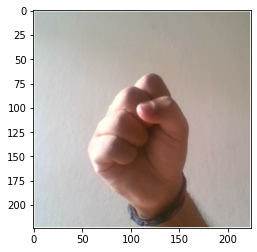

0


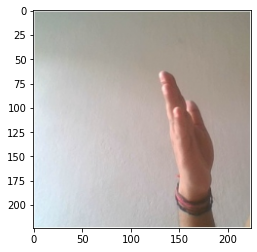

2


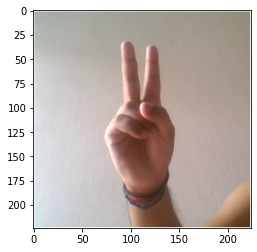

1


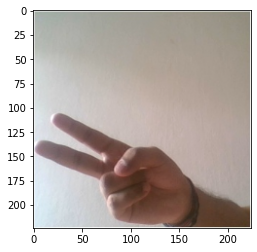

1


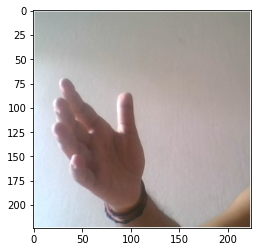

2


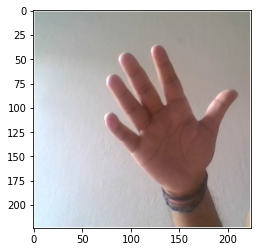

2


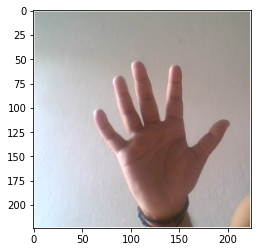

2


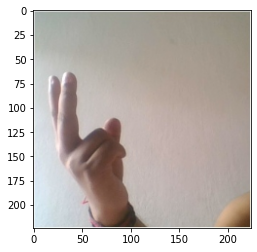

1


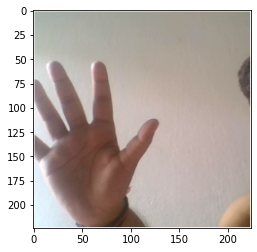

2


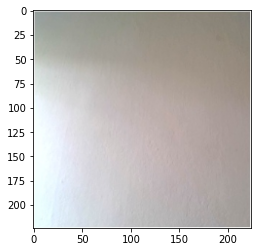

3


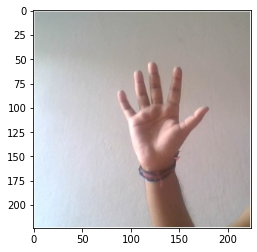

2


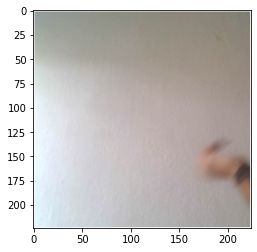

3


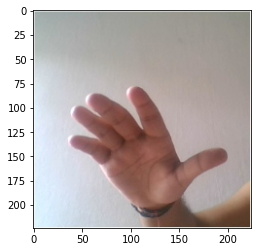

2


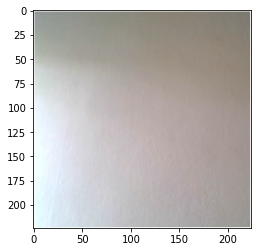

3


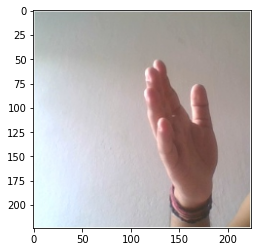

2


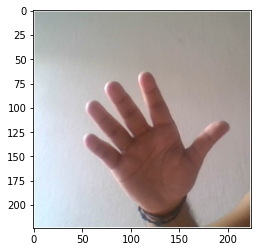

2


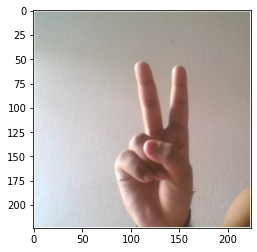

1


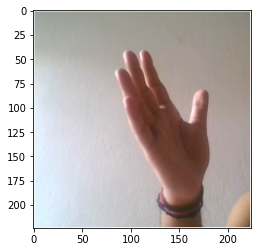

2


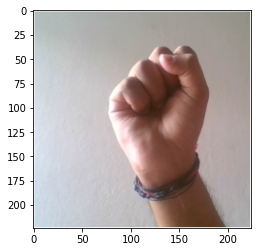

0


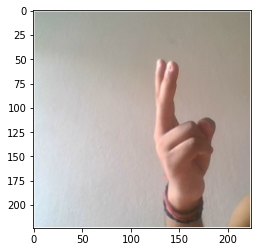

1


In [ ]:
i=0
d=0
for img in X:
  pred = model.predict(np.array([img]))
  move_code = np.argmax(pred[0])
  # plt.imshow(img,cmap="gray")
  # plt.show()
  # print(move_code)
  # i+=1
  # if i==5:
  #   break
  if move_code!=y[i]:
    d+=1
    print(d)
  i+=1



In [ ]:
print(d)

In [48]:
print(ohy)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
